<a href="https://colab.research.google.com/github/Kenethoriga/DataOpsKit/blob/main/LSTM_FinalBest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Dataset
data = {
    "Year": list(range(2000, 2024)),
    "Inflation (%)": [9.98, 5.74, 1.96, 9.82, 11.62, 10.31, 14.49, 9.8, 26.2, 10.3, 4.11, 14.0, 9.38, 5.72, 6.91, 6.58, 6.3, 4.69, 5.19, 5.4, 6.1, 6.5, 7.2, 6.9],
    "Imports (tons)": [18913, 19389, 19261, 25440, 26938, 23967, 23961, 22545, 17645, 16594, 16628, 18182, 19451, 18183, 20051, 21459, 21452, 20124, 24145, 24344, 26867, 29867, 28847, 27309],
    "Cost (Ksh/ton)": [93600, 101400, 109204, 118500, 120000, 124000, 137211, 114332, 149002, 150583, 234742, 280124, 258337, 280434, 288865, 308640, 296718, 267671, 271251, 270477, 245025, 272660, 292978, 305062],
    "Textile Waste (tons)": [4200, 4800, 5100, 6900, 7200, 6000, 5500, 6300, 5800, 4500, 5200, 6700, 7500, 6200, 6800, 7000, 6500, 5900, 8200, 7600, 9300, 8700, 9100, 8400],
    "Avg. Temp (°C)": [21.9, 22.1, 21.7, 21.4, 21.8, 22.3, 22, 21.5, 21.9, 22.6, 21.7, 22.2, 21.4, 22.5, 21.8, 22, 21.3, 22.7, 21.6, 21.9, 21.2, 22.4, 21.5, 22.1],
    "Annual Rainfall (mm)": [278.01, 767.26, 729.67, 613.8, 693.04, 397.73, 717.6, 473.89, 453.68, 408.56, 687.62, 582.9, 810.73, 798.64, 536.07, 801.42, 538.27, 352.55, 1043.19, 937.54, 1107.96, 610.92, 403.99, 448.47],
    "Key Event": [
        "Limited recycling infrastructure", "Drought reduces waste dumping", "Introduction of first landfill regulations",
        "Severe floods wash textiles into rivers", "Dandora landfill experiences significant overflows",
        "UNEP launches anti-dumping campaign", "Ban on textile burning implemented",
        "Community-led Kibera cleanup initiative launched", "Global economic crisis reduces consumption and waste generation",
        "Economic downturn results in lower textile waste", "Market flooded with cheaper synthetics from abroad",
        "Mitumba trade becomes formalized", "Dandora landfill officially declared hazardous",
        "Emergence of upcycling startups boosts textile recovery", "Africa Collect Textiles organization established",
        "National Waste Management Act passed", "Temporary EU export ban impacts supply dynamics",
        "Heightened concerns as pollution in Nairobi River peaks",
        "Acute waste management crisis in Kantamanto district emerges",
        "Disruptions in waste disposal due to COVID-19 measures",
        "Surge in PPE waste complicates textile waste management",
        "Post-COVID, a significant push towards enhanced recycling initiatives",
        "Expansion of Takataka Solutions improves recycling capabilities",
        "Renewed river cleanup initiative with community and technological support"
    ]
}
df = pd.DataFrame(data)
df

,Year,Inflation (%),Imports (tons),Cost (Ksh/ton),Textile Waste (tons),Avg. Temp (°C),Annual Rainfall (mm),Key Event
0,2000,9.98,18913,93600,4200,21.9,278.01,Limited recycling infrastructure
1,2001,5.74,19389,101400,4800,22.1,767.26,Drought reduces waste dumping
2,2002,1.96,19261,109204,5100,21.7,729.67,Introduction of first landfill regulations
3,2003,9.82,25440,118500,6900,21.4,613.80,Severe floods wash textiles into rivers
4,2004,11.62,26938,120000,7200,21.8,693.04,Dandora landfill experiences significant overf...
5,2005,10.31,23967,124000,6000,22.3,397.73,UNEP launches anti-dumping campaign
6,2006,14.49,23961,137211,5500,22.0,717.60,Ban on textile burning implemented
7,2007,9.80,22545,114332,6300,21.5,473.89,Community-led Kibera cleanup initiative launched
8,2008,26.20,17645,149002,5800,21.9,453.68,Global economic crisis reduces consumption and...
9,2009,10.30,16594,150583,4500,22.6,408.56,Economic downturn results in lower textile waste


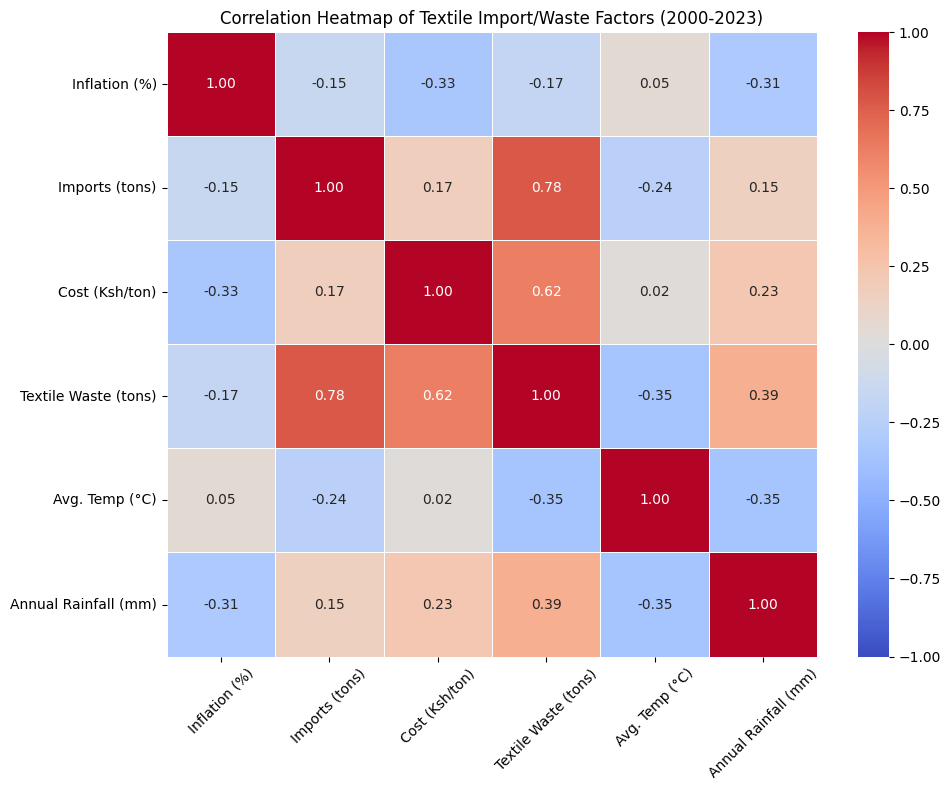

In [14]:
# ------------------------------
# 2. Correlation Analysis
# ------------------------------
# Select numerical columns (exclude 'Year' and 'Key Event')
numerical_cols = ['Inflation (%)', 'Imports (tons)', 'Cost (Ksh/ton)', 'Textile Waste (tons)', 'Avg. Temp (°C)', 'Annual Rainfall (mm)']
corr_matrix = df[numerical_cols].corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,      # Show correlation values
    cmap='coolwarm', # Color scheme (blue to red)
    fmt=".2f",       # Format to 2 decimal places
    linewidths=0.5,  # Add lines between cells
    vmin=-1,         # Minimum correlation value
    vmax=1           # Maximum correlation value
)

plt.title("Correlation Heatmap of Textile Import/Waste Factors (2000-2023)")
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

In [15]:
# Encode Key Event
label_encoder = LabelEncoder()
df['Event_Encoded'] = label_encoder.fit_transform(df['Key Event'])

# Feature Scaling

features = ['Inflation (%)', 'Imports (tons)', 'Cost (Ksh/ton)', 'Avg. Temp (°C)', 'Annual Rainfall (mm)', 'Event_Encoded']
target_imports = ['Imports (tons)']
target_waste = ['Textile Waste (tons)']

scaler_X = MinMaxScaler()
scaler_y_imports = MinMaxScaler()
scaler_y_waste = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df[features])
y_scaled_imports = scaler_y_imports.fit_transform(df[target_imports])
y_scaled_waste = scaler_y_waste.fit_transform(df[target_waste])


In [16]:
def create_sequences(X, y, window_size=3):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i+window_size])
        y_seq.append(y[i+window_size])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq_imports = create_sequences(X_scaled, y_scaled_imports, window_size=3)
_, y_seq_waste = create_sequences(X_scaled, y_scaled_waste, window_size=3)
# Print out shape and sample values
print("Shape of X_seq:", X_seq.shape)
print("Shape of y_seq_imports:", y_seq_imports.shape)
print("Shape of y_seq_waste:", y_seq_waste.shape)


Shape of X_seq: (21, 3, 6)
Shape of y_seq_imports: (21, 1)
Shape of y_seq_waste: (21, 1)


In [17]:
def build_model():
    model = Sequential()
    model.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_seq.shape[1], X_seq.shape[2])))
    model.add(LSTM(64, activation='tanh'))
    model.add(Dense(128))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def train_model(model, X_seq, y_seq, target_name):
    checkpoint_dir = f"checkpoints_{target_name}"
    os.makedirs(checkpoint_dir, exist_ok=True)
    checkpoint_path = os.path.join(checkpoint_dir, f"best_model_{target_name}.keras")
    checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='loss', save_best_only=True, mode='min', verbose=1)
    early_stop = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
    model.fit(X_seq, y_seq, epochs=200, batch_size=4, verbose=1, callbacks=[checkpoint, early_stop])
    return load_model(checkpoint_path)

model_imports = build_model()
best_model_imports = train_model(model_imports, X_seq, y_seq_imports, 'imports')

model_waste = build_model()
best_model_waste = train_model(model_waste, X_seq, y_seq_waste, 'waste')


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/6 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - loss: 0.2300
Epoch 1: loss improved from inf to 0.20795, saving model to checkpoints_imports/best_model_imports.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1999
Epoch 2/200
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1192
Epoch 2: loss improved from 0.20795 to 0.08508, saving model to checkpoints_imports/best_model_imports.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0909
Epoch 3/200
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0570
Epoch 3: loss did not improve from 0.08508
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0904
Epoch 4/200
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0467
Epoch 4: loss improved from 0.08508 to 0.07870, saving model to checkpoints_imports/best_model_imports.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0706
Epoch 5/200
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0830
Epoch 5: loss did not improve from 0.07870
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0846
Epoch 6/200
1/

In [18]:
# Function to predict future values
def forecast_future(model, X_scaled, future_years, scaler_y):
    current_seq = X_scaled[-3:].copy()  # Start with last 3 years of data
    future_preds = []  # Store future predictions

    for _ in range(future_years):
        # Predict next year
        pred = model.predict(current_seq[np.newaxis, :, :])
        future_preds.append(pred[0, 0])

        # Update sequence (slide window forward)
        next_seq = np.vstack([current_seq[1:], current_seq[-1]])
        current_seq = next_seq

    # Inverse transform to original scale
    return scaler_y.inverse_transform(np.array(future_preds).reshape(-1, 1))

# Forecast next 3 years (2024-2026)
future_years = 3
future_preds_imports = forecast_future(best_model_imports, X_scaled, future_years, scaler_y_imports)
future_preds_waste = forecast_future(best_model_waste, X_scaled, future_years, scaler_y_waste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


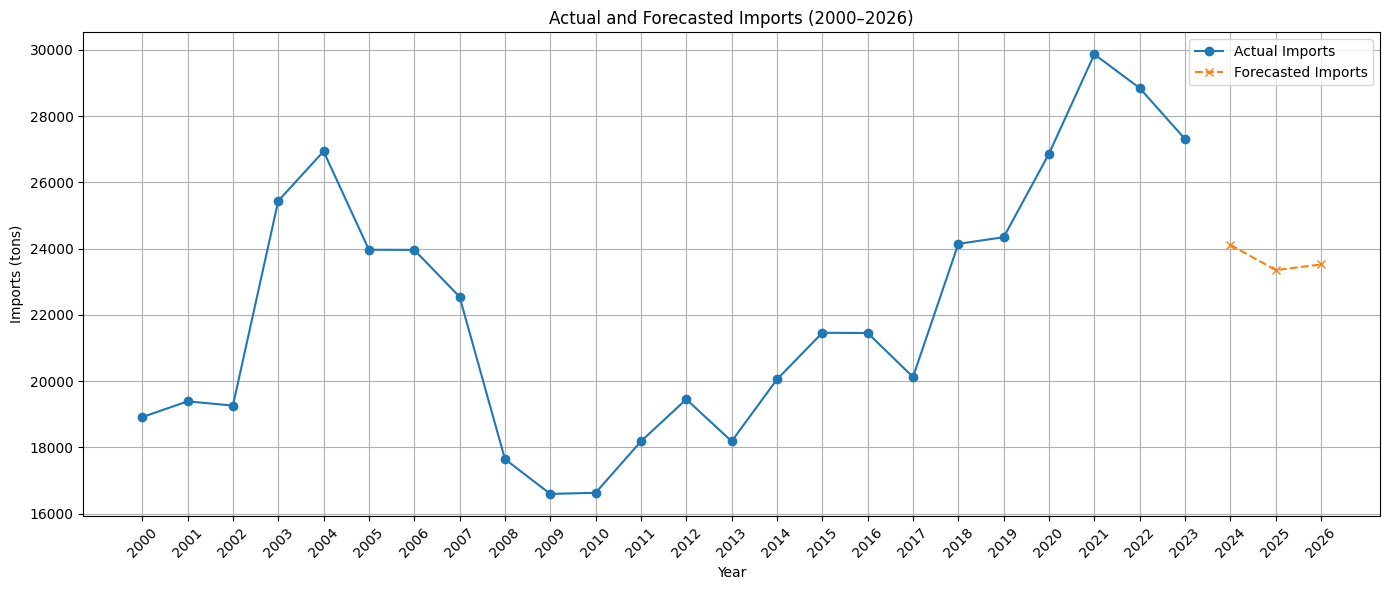

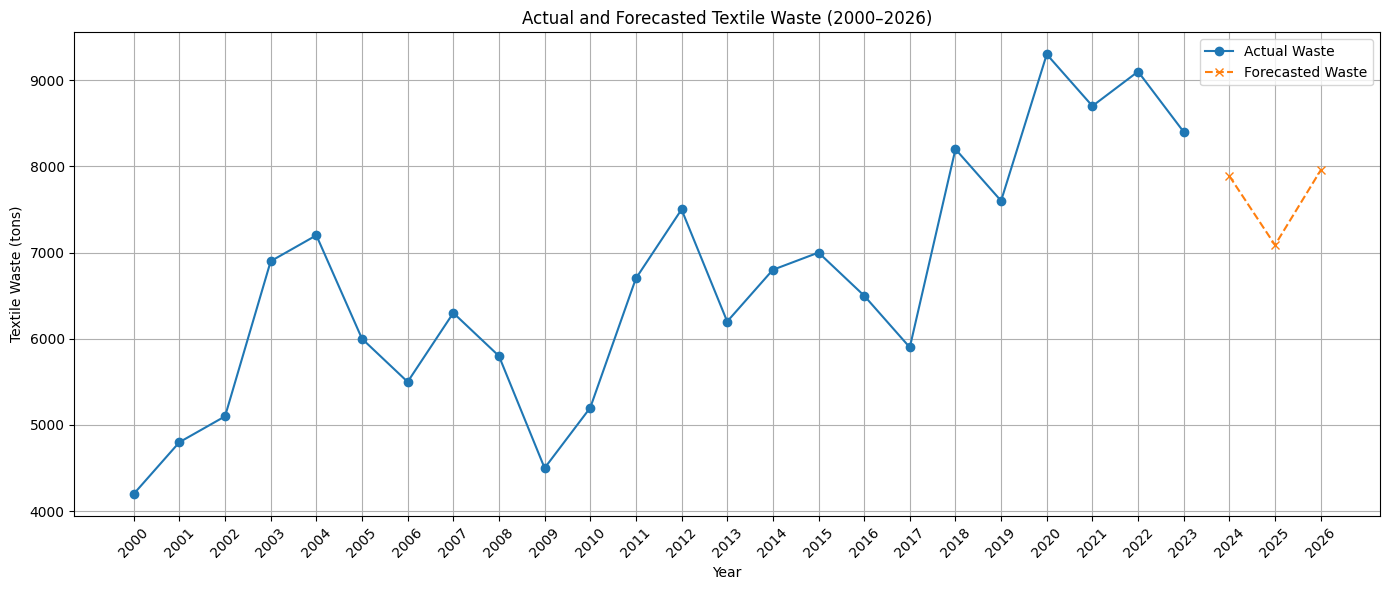

In [19]:
# Years for forecast (2024-2026)
years_forecast = list(range(2024, 2024 + future_years))

# Combine actual and forecasted data
df_combined = pd.DataFrame({
    'Year': list(df['Year']) + years_forecast,
    'Imports (tons)': list(df['Imports (tons)']) + list(future_preds_imports.flatten()),
    'Textile Waste (tons)': list(df['Textile Waste (tons)']) + list(future_preds_waste.flatten()),
    'Data Type': ['Actual'] * len(df['Year']) + ['Forecasted'] * future_years
})

# Plot imports forecast
plt.figure(figsize=(14, 6))
for dtype, d in df_combined.groupby("Data Type"):
    plt.plot(
        d['Year'],
        d['Imports (tons)'],
        label=f"{dtype} Imports",
        marker='o' if dtype == "Actual" else 'x',  # Different markers
        linestyle='--' if dtype == "Forecasted" else '-'  # Different line styles
    )
plt.xlabel("Year")
plt.ylabel("Imports (tons)")
plt.title("Actual and Forecasted Imports (2000–2026)")
plt.xticks(ticks=range(df_combined['Year'].min(), df_combined['Year'].max() + 1), rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Plot waste forecast (similar structure)
plt.figure(figsize=(14, 6))
for dtype, d in df_combined.groupby("Data Type"):
    plt.plot(
        d['Year'],
        d['Textile Waste (tons)'],
        label=f"{dtype} Waste",
        marker='o' if dtype == "Actual" else 'x',
        linestyle='--' if dtype == "Forecasted" else '-'
    )
plt.xlabel("Year")
plt.ylabel("Textile Waste (tons)")
plt.title("Actual and Forecasted Textile Waste (2000–2026)")
plt.xticks(ticks=range(df_combined['Year'].min(), df_combined['Year'].max() + 1), rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

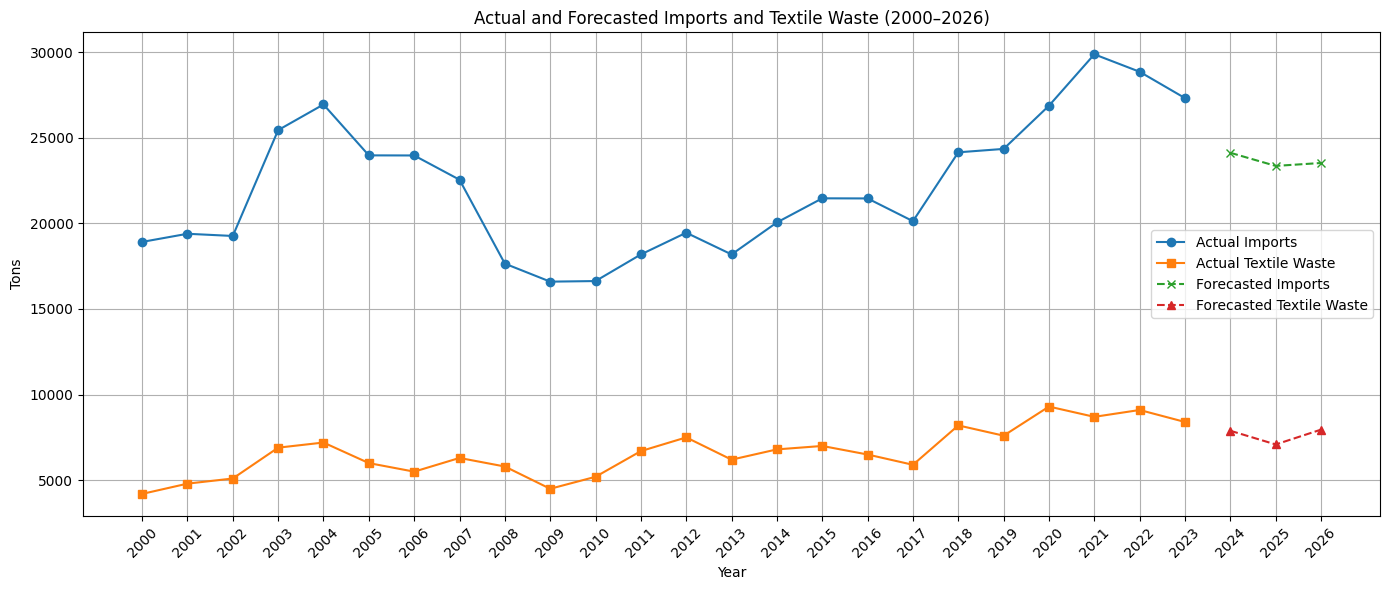

In [20]:
# Define number of forecast years
future_years = 3
years_forecast = list(range(2024, 2024 + future_years))

# Combine actual and forecasted data
df_combined = pd.DataFrame({
    'Year': list(df['Year']) + years_forecast,
    'Imports (tons)': list(df['Imports (tons)']) + list(future_preds_imports.flatten()),
    'Textile Waste (tons)': list(df['Textile Waste (tons)']) + list(future_preds_waste.flatten()),
    'Data Type': ['Actual'] * len(df['Year']) + ['Forecasted'] * future_years
})

# Plot both imports and textile waste on the same graph
plt.figure(figsize=(14, 6))
for dtype, d in df_combined.groupby("Data Type"):
    plt.plot(
        d['Year'],
        d['Imports (tons)'],
        label=f"{dtype} Imports",
        marker='o' if dtype == "Actual" else 'x',
        linestyle='--' if dtype == "Forecasted" else '-'
    )
    plt.plot(
        d['Year'],
        d['Textile Waste (tons)'],
        label=f"{dtype} Textile Waste",
        marker='s' if dtype == "Actual" else '^',
        linestyle='--' if dtype == "Forecasted" else '-'
    )

plt.xlabel("Year")
plt.ylabel("Tons")
plt.title("Actual and Forecasted Imports and Textile Waste (2000–2026)")
plt.xticks(ticks=range(df_combined['Year'].min(), df_combined['Year'].max() + 1), rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):  # Define MAPE manually
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), 1e-10, None))) * 100

# ------------------------------
# 9. Evaluate Model Performance on Training Data
# ------------------------------
def evaluate_model(model, X_seq, y_true, scaler_y, label):
    y_pred = model.predict(X_seq)
    y_pred_inv = scaler_y.inverse_transform(y_pred)
    y_true_inv = scaler_y.inverse_transform(y_true)

    mae = mean_absolute_error(y_true_inv, y_pred_inv)
    mape = mean_absolute_percentage_error(y_true_inv, y_pred_inv)
    r2 = r2_score(y_true_inv, y_pred_inv)

    print(f"\nModel Metrics for {label}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R-squared (R²): {r2:.4f}")

# Evaluate both models
evaluate_model(best_model_imports, X_seq, y_seq_imports, scaler_y_imports, "Imports")
evaluate_model(best_model_waste, X_seq, y_seq_waste, scaler_y_waste, "Textile Waste")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step

Model Metrics for Imports:
Mean Absolute Error (MAE): 631.07
Mean Absolute Percentage Error (MAPE): 2.94%
R-squared (R²): 0.9512
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step

Model Metrics for Textile Waste:
Mean Absolute Error (MAE): 218.07
Mean Absolute Percentage Error (MAPE): 3.02%
R-squared (R²): 0.9415


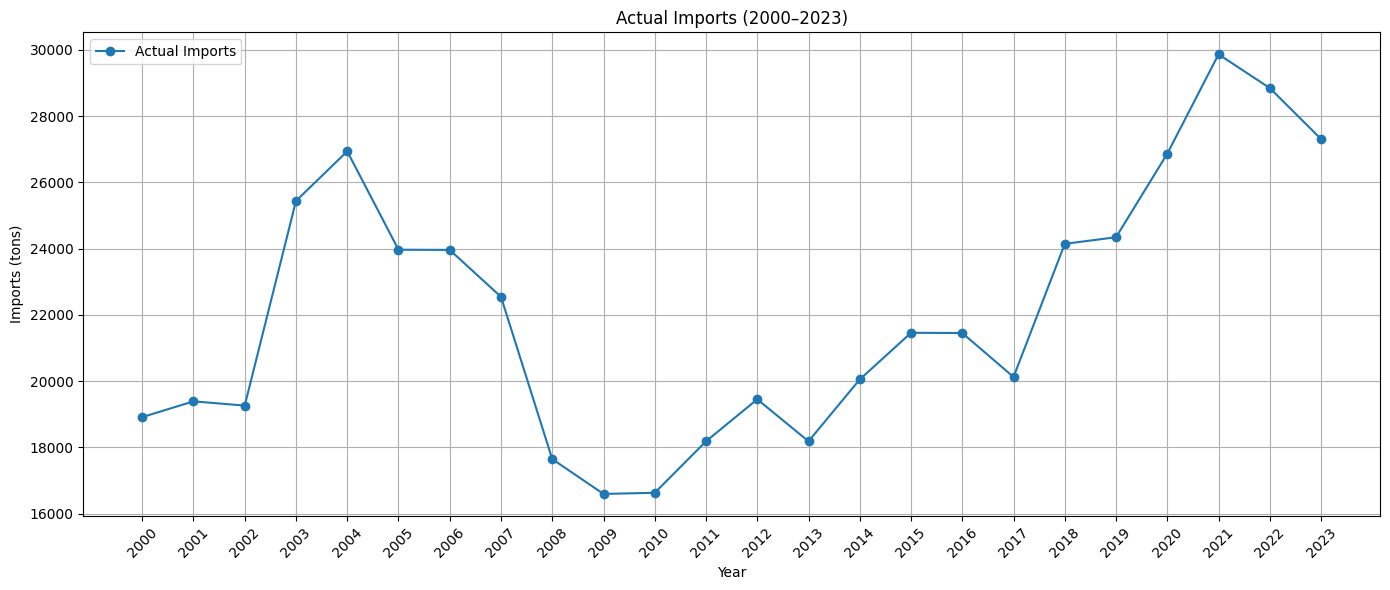

In [22]:
import matplotlib.pyplot as plt

# Plot actual imports
plt.figure(figsize=(14, 6))
plt.plot(
    df['Year'],
    df['Imports (tons)'],
    label="Actual Imports",
    marker='o',
    linestyle='-'
)
plt.xlabel("Year")
plt.ylabel("Imports (tons)")
plt.title("Actual Imports (2000–2023)")
plt.xticks(ticks=range(df['Year'].min(), df['Year'].max() + 1), rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




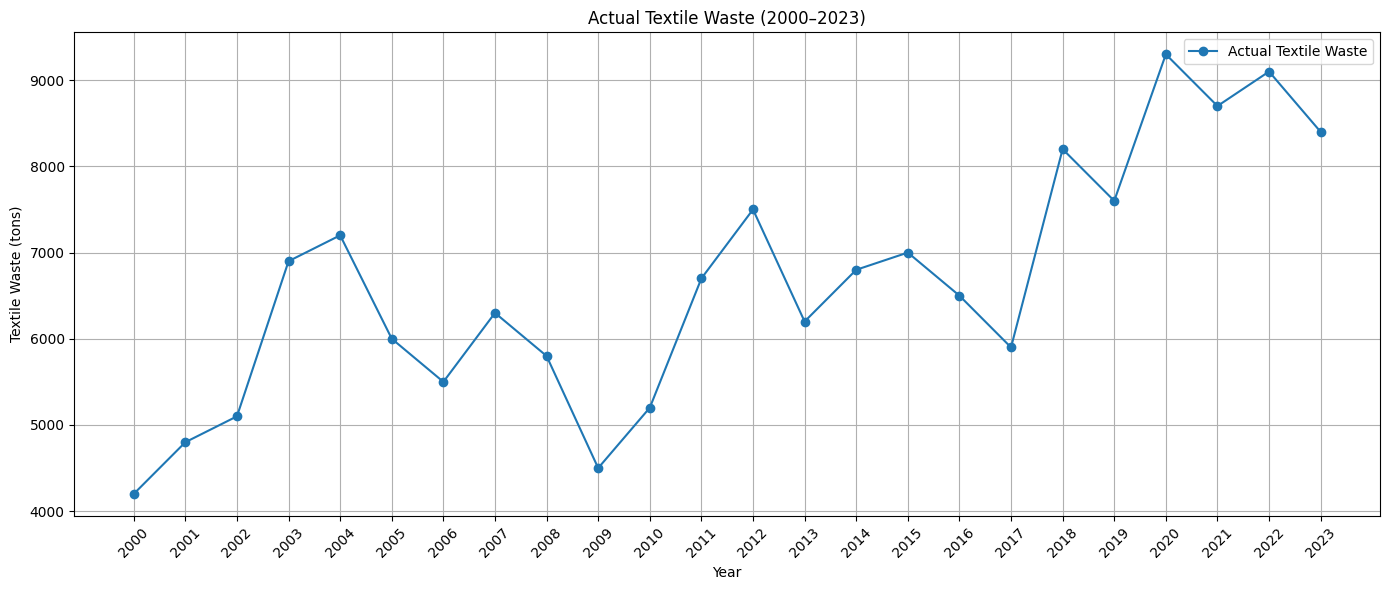

In [23]:
# Plot actual textile waste
plt.figure(figsize=(14, 6))
plt.plot(
    df['Year'],
    df['Textile Waste (tons)'],
    label="Actual Textile Waste",
    marker='o',
    linestyle='-'
)
plt.xlabel("Year")
plt.ylabel("Textile Waste (tons)")
plt.title("Actual Textile Waste (2000–2023)")
plt.xticks(ticks=range(df['Year'].min(), df['Year'].max() + 1), rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Forecasted Textile Imports and Waste (2024–2026):

 Year  Imports (tons)  Textile Waste (tons)
 2024    24116.896484           7887.663086
 2025    23351.017578           7087.560059
 2026    23521.896484           7954.471680


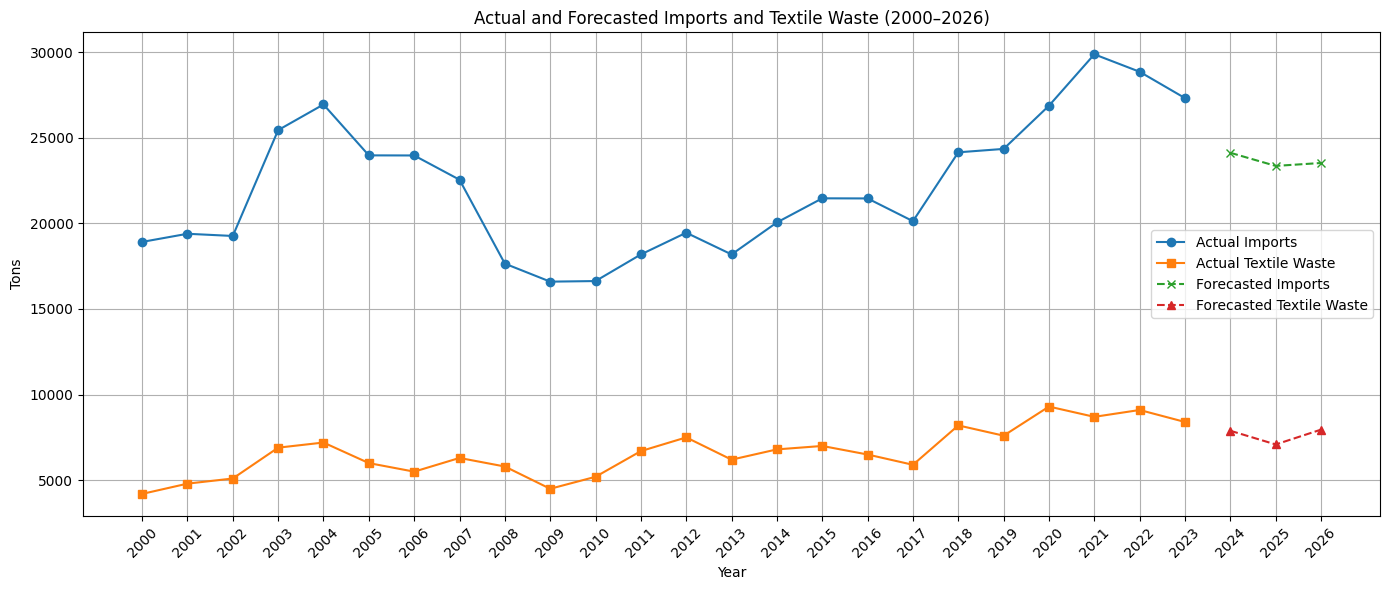

In [24]:
# Define number of forecast years
future_years = 3
years_forecast = list(range(2024, 2024 + future_years))

# Combine actual and forecasted data
df_combined = pd.DataFrame({
    'Year': list(df['Year']) + years_forecast,
    'Imports (tons)': list(df['Imports (tons)']) + list(future_preds_imports.flatten()),
    'Textile Waste (tons)': list(df['Textile Waste (tons)']) + list(future_preds_waste.flatten()),
    'Data Type': ['Actual'] * len(df['Year']) + ['Forecasted'] * future_years
})

# Print forecasted figures for each year
print("Forecasted Textile Imports and Waste (2024–2026):\n")
forecast_data = df_combined[df_combined['Data Type'] == 'Forecasted'][['Year', 'Imports (tons)', 'Textile Waste (tons)']]
print(forecast_data.to_string(index=False))

# Plot both imports and textile waste on the same graph
plt.figure(figsize=(14, 6))
for dtype, d in df_combined.groupby("Data Type"):
    plt.plot(
        d['Year'],
        d['Imports (tons)'],
        label=f"{dtype} Imports",
        marker='o' if dtype == "Actual" else 'x',
        linestyle='--' if dtype == "Forecasted" else '-'
    )
    plt.plot(
        d['Year'],
        d['Textile Waste (tons)'],
        label=f"{dtype} Textile Waste",
        marker='s' if dtype == "Actual" else '^',
        linestyle='--' if dtype == "Forecasted" else '-'
    )

plt.xlabel("Year")
plt.ylabel("Tons")
plt.title("Actual and Forecasted Imports and Textile Waste (2000–2026)")
plt.xticks(ticks=range(df_combined['Year'].min(), df_combined['Year'].max() + 1), rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
